## EDA taxi_zones

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [107]:
# Cargar del archivo CSV
df = pd.read_csv(r'C:\Users\marie\Downloads\data\taxi_zones.csv')

In [108]:
# Muestra las primeras filas del DataFrame
print(df.head())

   OBJECTID,N,9,0  Shape_Leng,N,19,11  Shape_Area,N,19,11  \
0               1            0.116357            0.000782   
1               2            0.433470            0.004866   
2               3            0.084341            0.000314   
3               4            0.043567            0.000112   
4               5            0.092146            0.000498   

                zone,C,254  LocationID,N,4,0  borough,C,254  
0           Newark Airport                 1            EWR  
1              Jamaica Bay                 2         Queens  
2  Allerton/Pelham Gardens                 3          Bronx  
3            Alphabet City                 4      Manhattan  
4            Arden Heights                 5  Staten Island  


In [109]:
# Información básica sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID,N,9,0      263 non-null    int64  
 1   Shape_Leng,N,19,11  263 non-null    float64
 2   Shape_Area,N,19,11  263 non-null    float64
 3   zone,C,254          263 non-null    object 
 4   LocationID,N,4,0    263 non-null    int64  
 5   borough,C,254       263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


In [110]:
# Resumen estadístico de las variables numéricas
df.describe()

,"OBJECTID,N,9,0","Shape_Leng,N,19,11","Shape_Area,N,19,11","LocationID,N,4,0"
count,263.000000,263.000000,263.000000,263.000000
mean,132.000000,0.094269,0.000402,131.984791
std,76.065761,0.054594,0.000482,76.073787
min,1.000000,0.014306,0.000006,1.000000
25%,66.500000,0.054722,0.000133,66.500000
50%,132.000000,0.084341,0.000268,132.000000
75%,197.500000,0.119488,0.000480,197.500000
max,263.000000,0.433470,0.004866,263.000000


In [111]:
# Revisamos si aun hay valores nulos y los sumamos
df.isnull().sum()

OBJECTID,N,9,0        0
Shape_Leng,N,19,11    0
Shape_Area,N,19,11    0
zone,C,254            0
LocationID,N,4,0      0
borough,C,254         0
dtype: int64

In [112]:
# Revisamos si hay valores duplicados
df.duplicated().sum()

# No se cuenta con valores duplicados 

0

In [113]:
print(df.columns)

Index(['OBJECTID,N,9,0', 'Shape_Leng,N,19,11', 'Shape_Area,N,19,11',
       'zone,C,254', 'LocationID,N,4,0', 'borough,C,254'],
      dtype='object')


Por praticidad se le cambiaran los nombres a las columnas.

In [114]:
# Definir los nuevos nombres de las columnas
nuevos_nombres = {'OBJECTID,N,9,0': 'Objeto',
                  'Shape_Leng,N,19,11': 'Longitud',
                  'Shape_Area,N,19,11': 'Latitud',
                  'zone,C,254': 'Zona',
                  'LocationID,N,4,0': 'ID',
                  'borough,C,254': 'Municipio'}

# Renombrar las columnas
df = df.rename(columns=nuevos_nombres)

# Mostrar los nombres de las columnas después del cambio
print("Nombres de las columnas después del cambio:")
print(df.columns)


Nombres de las columnas después del cambio:
Index(['Objeto', 'Longitud', 'Latitud', 'Zona', 'ID', 'Municipio'], dtype='object')


In [115]:
#variables numéricas
df_numericas = df.select_dtypes(include=['int', 'float'])

In [116]:
#variables categóricas
df_categoricas = df.select_dtypes(include=['object', 'bool'])

# MATRIZ DE CORRELACION

<Axes: >

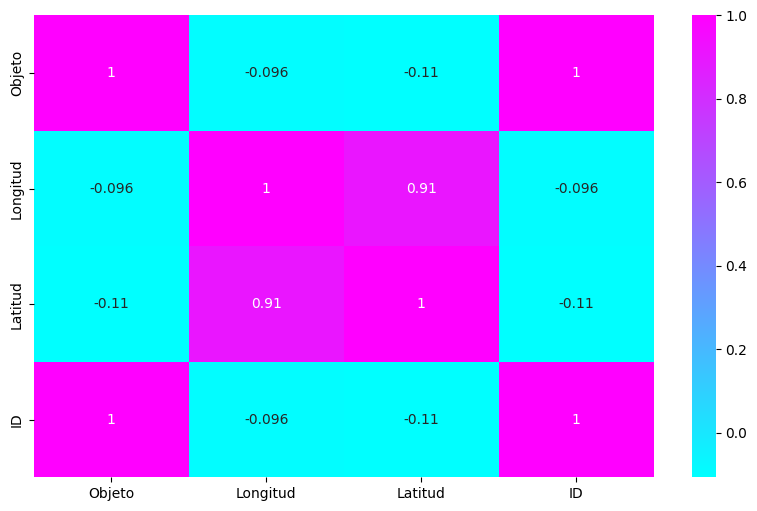

In [117]:
# Calcula la matriz de correlación entre las variables numéricas
matriz_correlacion = df_numericas.corr()

# Crea un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='cool')

# Graficas

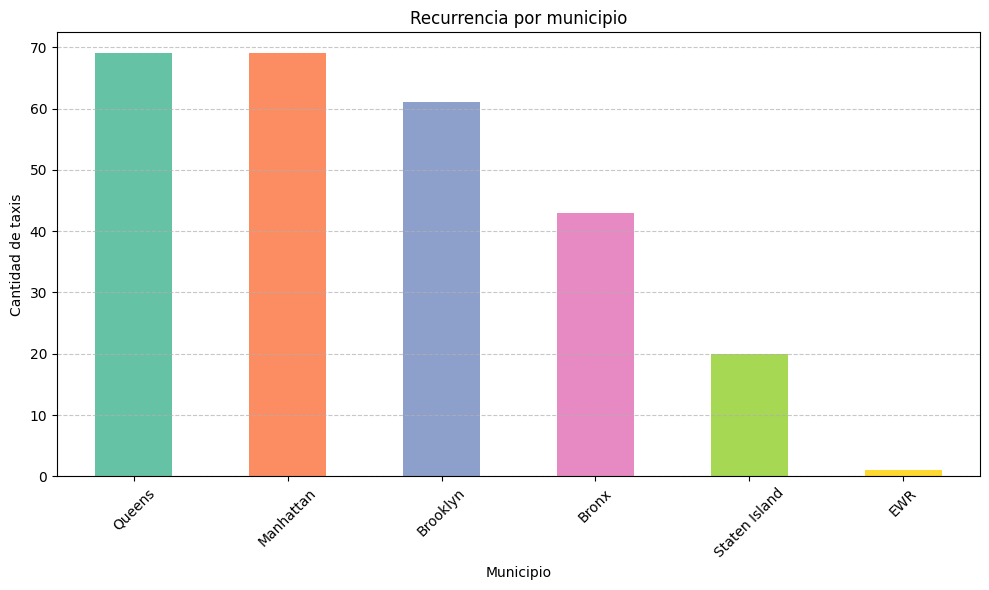

In [118]:
# Contar la cantidad de concurrencias de cada municipio
conteo_municipios = df['Municipio'].value_counts()

# Crear un gráfico de barras con colores variados
plt.figure(figsize=(10, 6))
conteo_municipios.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Recurrencia por municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de taxis')
plt.xticks(rotation=45)  # Rotar los nombres de los municipios en el eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar que los elementos se superpongan
plt.show()


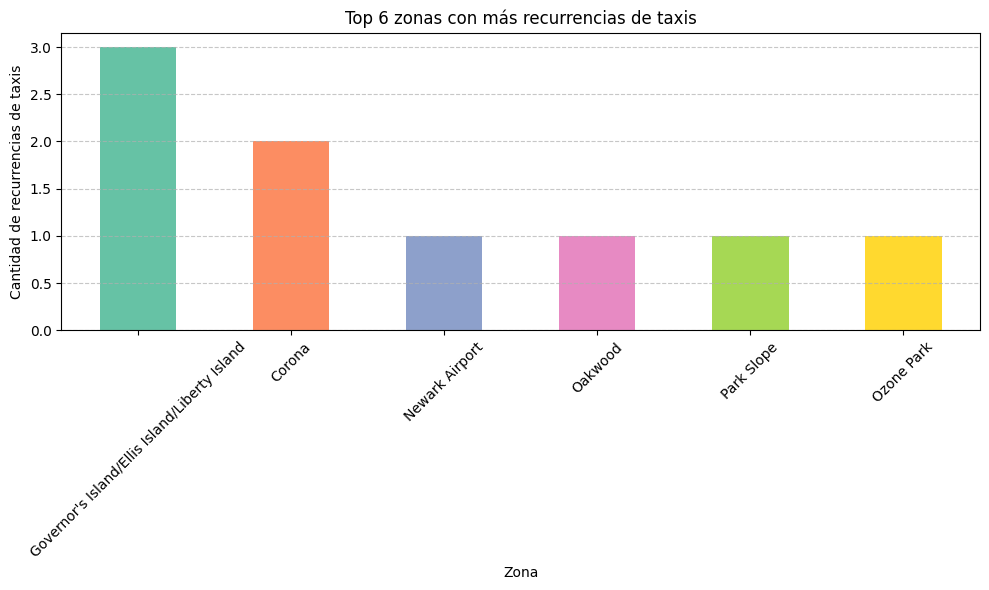

In [119]:
# Contar la cantidad de concurrencias de cada municipio
conteo_municipios = df['Zona'].value_counts()

# Mostrar los primeros 10 municipios con más recurrencia
top_10_municipios = conteo_municipios.head(6)

# Crear un gráfico de barras para visualizar los municipios con colores diferentes
plt.figure(figsize=(10, 6))
top_10_municipios.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Top 6 zonas con más recurrencias de taxis')
plt.xlabel('Zona')
plt.ylabel('Cantidad de recurrencias de taxis')
plt.xticks(rotation=45)  # Rotar los nombres de los municipios en el eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar que los elementos se superpongan
plt.show()


In [120]:
# Contar la cantidad de concurrencias de cada zona
conteo_zonas = df['Zona'].value_counts()

# Mostrar las 10 zonas con más concurrencias
top_10_zonas = conteo_zonas.head(10)

# Imprimir el resultado
print(top_10_zonas)

Zona
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Oakwood                                          1
Park Slope                                       1
Ozone Park                                       1
Old Astoria                                      1
Ocean Parkway South                              1
Ocean Hill                                       1
Oakland Gardens                                  1
Name: count, dtype: int64


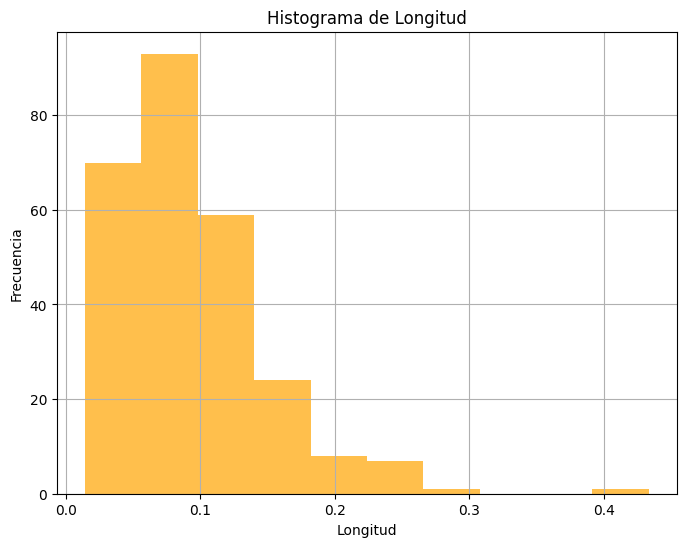

In [121]:
# Graficar histograma de longitud
plt.figure(figsize=(8, 6))
plt.hist(df['Longitud'], bins=10, color='orange', alpha=0.7)
plt.title('Histograma de Longitud')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


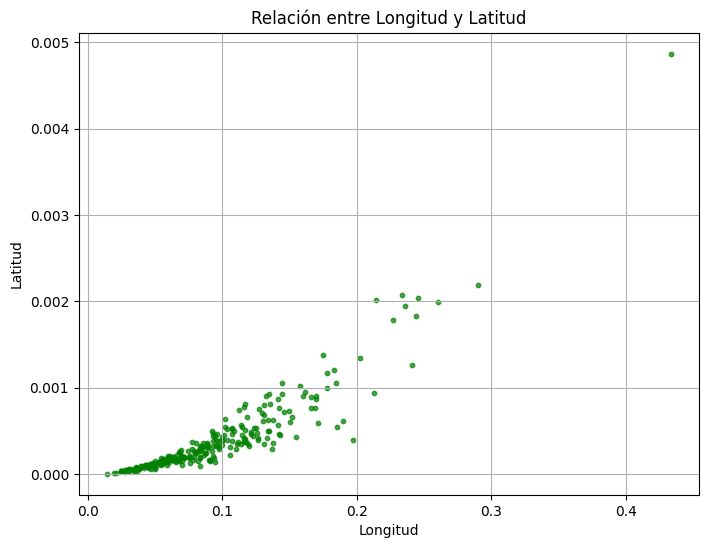

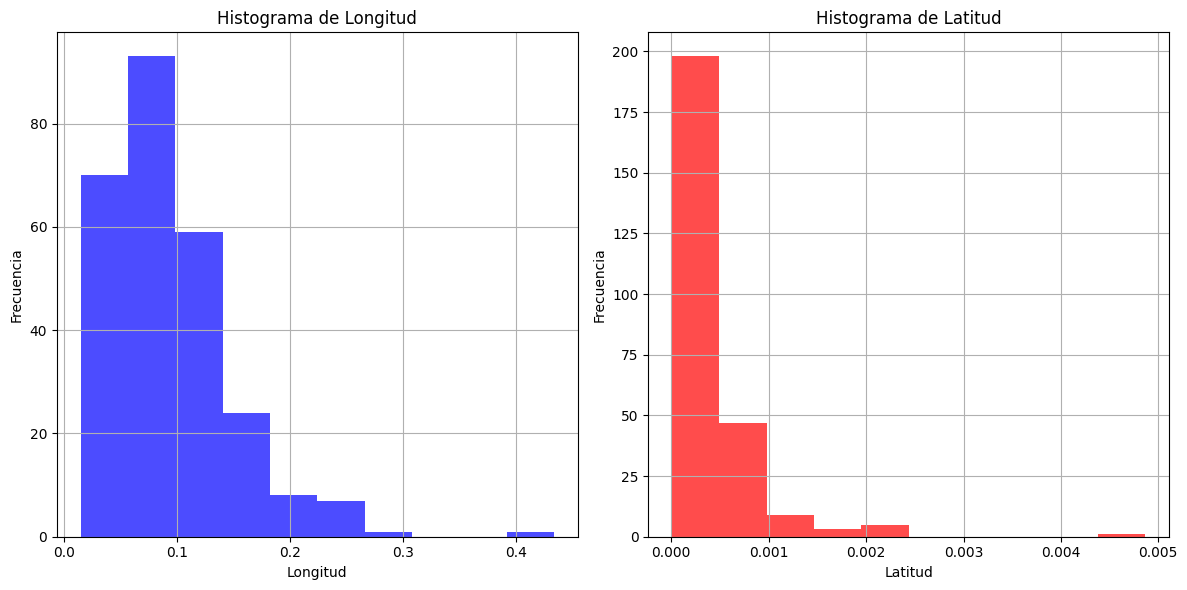

In [122]:
# Creo estos estan de mas pero vamos a evaluarlos 

# Crear un gráfico de dispersión para visualizar la relación entre la longitud y la latitud
plt.figure(figsize=(8, 6))
plt.scatter(df['Longitud'], df['Latitud'], s=10, alpha=0.7, color='green')
plt.title('Relación entre Longitud y Latitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

# Crear un gráfico combinado para comparar la distribución de la longitud y la latitud
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de histograma de longitud
axs[0].hist(df['Longitud'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Histograma de Longitud')
axs[0].set_xlabel('Longitud')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

# Gráfico de histograma de latitud
axs[1].hist(df['Latitud'], bins=10, color='red', alpha=0.7)
axs[1].set_title('Histograma de Latitud')
axs[1].set_xlabel('Latitud')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## EDA taxi_zone_lookup

In [51]:
# Cargar del archivo CSV
df= pd.read_csv(r'C:\Users\marie\Downloads\data\taxi+_zone_lookup.csv')

In [52]:
# Muestra las primeras filas del DataFrame
print(df.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [53]:
# Información básica sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [54]:
# Resumen estadístico de las variables numéricas
df.describe()

,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


In [55]:
# Revisamos si aun hay valores nulos y los sumamos
df.isnull().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [56]:
# Revisamos si hay valores duplicados
df.duplicated().sum()

# No se encontraron valores duplicados 

0

In [58]:
# Definir los nuevos nombres de las columnas
nuevos_nombres = {'LocationID': 'ID',
                  'Borough': 'Municipio',
                  'Zone': 'Zona',
                  'service_zone': 'Zona servicio'}

# Renombrar las columnas
df = df.rename(columns=nuevos_nombres)

# Mostrar los nombres de las columnas después del cambio
print("Nombres de las columnas después del cambio:")
print(df.columns)

Nombres de las columnas después del cambio:
Index(['ID', 'Municipio', 'Zona', 'Zona servicio'], dtype='object')


# Graficas

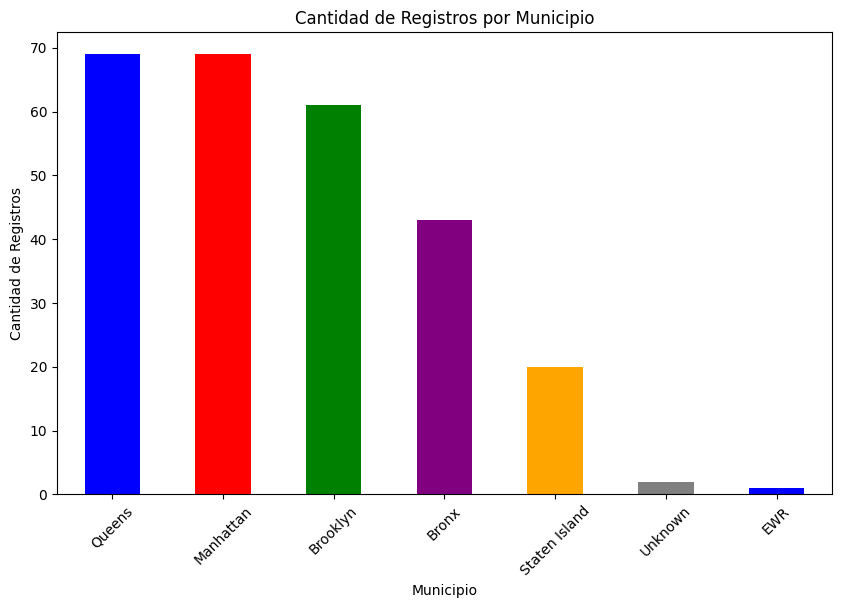

In [98]:
# Gráfico de barras para Municipio
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'gray']
df['Municipio'].value_counts().plot(kind='bar',color=colors)
plt.title('Cantidad de Registros por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.show()

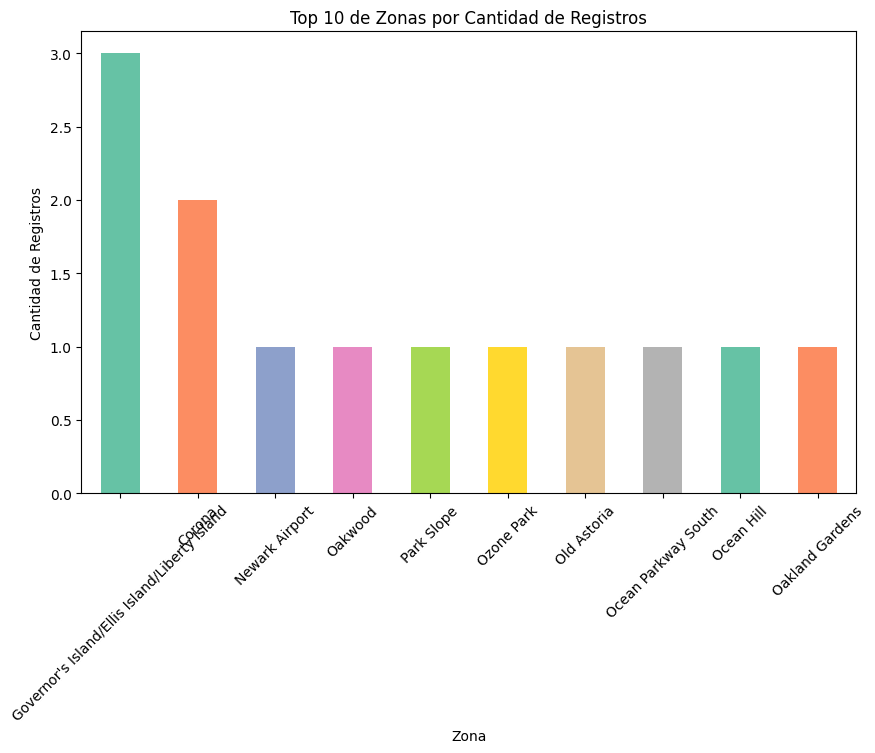

In [123]:
# Seleccionar las 10 zonas con más registros
top_zonas = df['Zona'].value_counts().nlargest(10)

# Crear el gráfico de barras con colores diferentes
plt.figure(figsize=(10, 6))
top_zonas.plot(kind='bar', color=plt.cm.Set2.colors)
plt.title('Top 10 de Zonas por Cantidad de Registros')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.show()


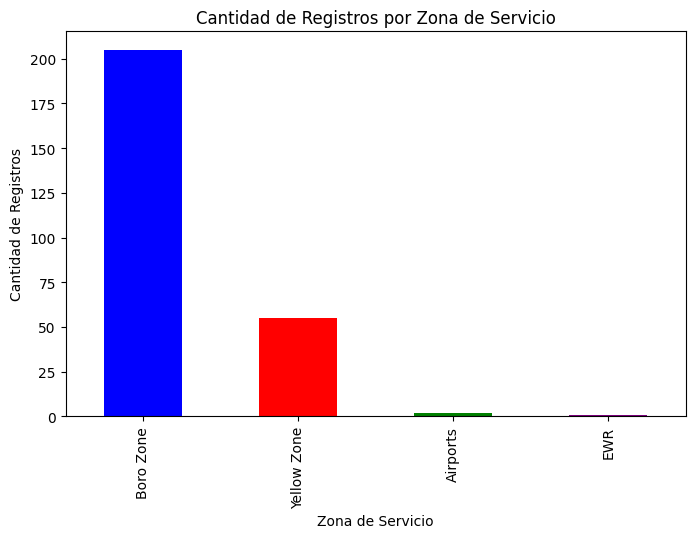

In [97]:
plt.figure(figsize=(8, 5))
df['Zona servicio'].value_counts().plot(kind='bar', color=colors)
plt.title('Cantidad de Registros por Zona de Servicio')
plt.xlabel('Zona de Servicio')
plt.ylabel('Cantidad de Registros')
plt.show()

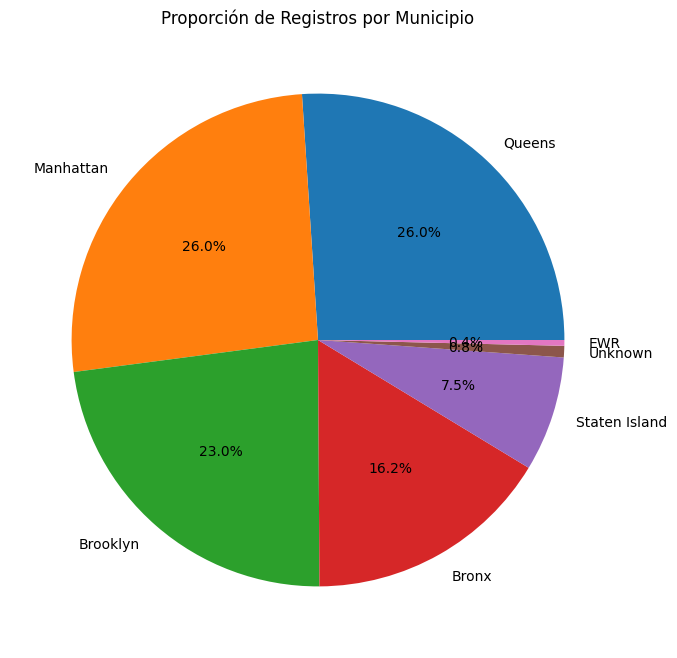

In [62]:
# Gráfico de pastel para Municipio
plt.figure(figsize=(8, 8))
df['Municipio'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Registros por Municipio')
plt.ylabel('')
plt.show()

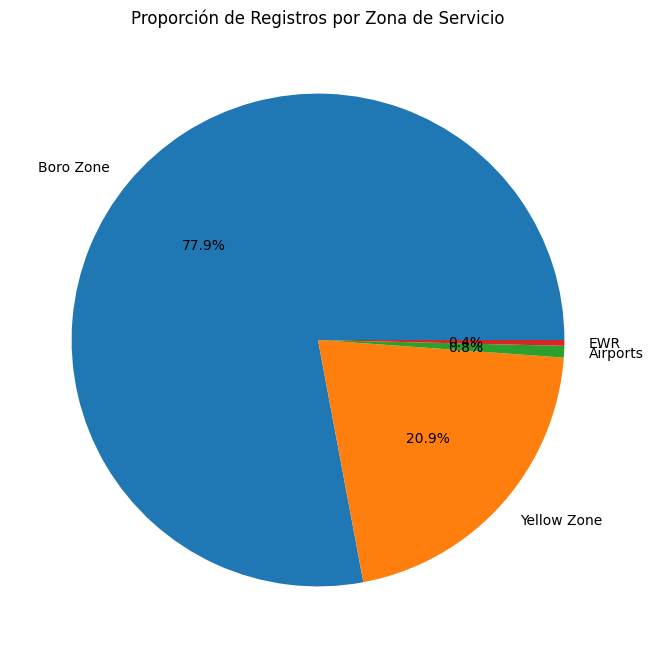

In [64]:
# Gráfico de pastel para Zona de servicio
plt.figure(figsize=(8, 8))
df['Zona servicio'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Registros por Zona de Servicio')
plt.ylabel('')
plt.show()